## Regression Trees

<img width="60%" class="imgright" src="../images/Regression_Tree.webp" srcset="../images/Regression_Tree_800w.webp 800w,../images/Regression_Tree_700w.webp 700w,../images/Regression_Tree_600w.webp 600w,../images/Regression_Tree_500w.webp 500w,../images/Regression_Tree_400w.webp 400w,../images/Regression_Tree_350w.webp 350w,../images/Regression_Tree_300w.webp 300w" alt="Regression Tree"/>
<br>

In the [previous chapter](https://www.python-course.eu/Decision_Trees.php) about Classification decision Trees we have introduced the basic concepts underlying decision tree models, how they can be build with Python from scratch as well as using the prepackaged sklearn DecisionTreeClassifier method. We have also introduced advantages and disadvantages of decision tree models as well as important extensions and variations. One disadvantage of Classification decision Trees is that they need a target feature which is categorically scaled like for instance weather = {Sunny, Rainy, Overcast, Thunderstorm}.
<br>
Here arises a problem: What if we want our tree for instance to predict the price of a house given some target feature attributes like the number of rooms and the location? Here the values of the target feature (prize) are no longer categorically scaled but are continuous - A house can have, theoretically, a infinite number of different prices - <br>
<br>
Thats where *Regression Trees* come in. Regression Trees work in principal in the same way as Classification Trees with the large difference that the target feature values can now take on an infinite number of continuously scaled values. Hence the task is now to predict the value of a continuously scaled target feature Y given the values of a set of categorically (or continuously) scaled descriptive features X. 

<img width="90%" src="../images/Categorical_Continuous_Prices.webp" srcset="../images/Categorical_Continuous_Prices_800w.webp 800w,../images/Categorical_Continuous_Prices_700w.webp 700w,../images/Categorical_Continuous_Prices_600w.webp 600w,../images/Categorical_Continuous_Prices_500w.webp 500w,../images/Categorical_Continuous_Prices_400w.webp 400w,../images/Categorical_Continuous_Prices_350w.webp 350w,../images/Categorical_Continuous_Prices_300w.webp 300w" alt="Categorical Continuous Prices"/><br>
<br>
As stated above, the principle of building a Regression Tree follows the same approach as the creation of a Classification Tree.<br> 
We search for the descriptive feature which splits the target feature values most purely, divide the dataset along the values of this descriptive feature and repeat this process for each of the sub datasets until we accomplish a stopping criteria.If we accomplish a stopping criteria, we grow a leaf node.<br>
Though, a few things changed.<br>
First of all, let us consider the stopping criteria we have introduced in the Classification Tree chapter to grow a leaf node:<br>

1. If the splitting process leads to a empty dataset, return the mode target feature value of the original dataset<br> 
2. If the splitting process leads to a dataset where no features are left, return the mode target feature value of the direct parent node<br>
3. If the splitting process leads to a dataset where the target feature values are pure, return this value<br>

If we now consider the property of our new continuously scaled target feature we mention that the third stopping criteria can no longer be used  since the target feature values can now take on an infinite number of different values. Consequently, it is most likely that we will not find pure target feature values until there is only one instance left in the dataset.
<br>
To make a long story short, there is in general nothing like pure target feature values.
<br>
<br>
To address this issue, we will introduce an early stopping criteria that returns the average value of the target feature values left in the dataset if the number of instances in the dataset is $\leq 5$.
<br>
In general, while handling with *Regression Trees* we will return the average target feature values as prediction at a leaf node.
<br>
The second change we have to make becomes apparent when we consider the splitting process itself.
<br>
While working with Classification Trees we used the Information Gain (IG) of a feature as splitting criteria. That is, the feature with the largest IG was used to split the dataset on. Consider the following example where we examine only one descriptive feature, lets say the number of bedrooms, and the costs of the house as target feature.


In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'Number_of_Bedrooms':[2,2,4,1,3,1,4,2],'Price_of_Sale':[100000,120000,250000,80000,220000,170000,500000,75000]})
df

,Number_of_Bedrooms,Price_of_Sale
0,2,100000
1,2,120000
2,4,250000
3,1,80000
4,3,220000
5,1,170000
6,4,500000
7,2,75000


Now how would we calculate the entropy of the *Number_of_Bedrooms* feature?
<br>
<br>
$H(Number \ of \ Bedrooms) = \sum_{j \ \in \ Number \ of \ Bedrooms}*(\frac{|D_{Number \ of \ Bedrooms = j}|}{|D|} * (\sum_{k \ \in \ Price \ of \ Sale}*(-P(k \ | \ j)*log2(P(k \ | \ j))))) $
<br>
<br>
If we calculate the weighted entropies, we see that for j = 3, we get a weighted entropy of 0. We get this result because there is only one house in the dataset with 3 bedrooms. On the other hand, for j = 2 (occurs three times) we will get a weighted entropy of 0.59436.
<br>
To make a long story short, since our target feature is continuously scaled, the IGs of the categorically scaled descriptive features are no longer appropriate splitting criteria.
<br>
Well, we could instead categorize the target feature along its values where for instance housing prices between ```$0``` and ```$80000``` are categorized as low, between ```$80001``` and ```$150000``` as middle and > ```$150001``` as high.
<br>
What we have done here is converting our regression problem into kind of a classification problem. Though, since we want to be able to make predictions from a infinite number of possible values (regression) this is not what we are looking for.<br>
<br>
Lets come back to our initial issue: We want to have a splitting criteria which allows us to split the dataset in such a way that when arriving a tree node, the predicted value (we defined the predicted value as the mean target feature value of the instances at this leaf node where we defined the minimum number of 5 instances as early stopping criteria) is closest to the actual value.<br>
It turns out that the variance is one of the most commonly used splitting criteria for regression trees where we will use the variance as splitting criteria.<br>
The explanation therefore is, that we want to search for the feature attributes which most exactly point to the real target feature values when splitting the dataset along the values of these target features. Therefore, examine the following picture. What do you think which of those two layouts of the *Number_of_Bedrooms* feature points more exactly to the real sales prize?

<img width="90%" src="../images/Concept_of_Variance.webp" srcset="../images/Concept_of_Variance_700w.webp 700w,../images/Concept_of_Variance_600w.webp 600w,../images/Concept_of_Variance_500w.webp 500w,../images/Concept_of_Variance_400w.webp 400w,../images/Concept_of_Variance_350w.webp 350w,../images/Concept_of_Variance_300w.webp 300w" alt="Concept of Variance" /><br>
<br>
Well, obviously that one with the smallest variance! We will introduce the maths behind the measure of variance in the next section.
<br>
For the time being we start by illustrating these by arrows where wide arrows represent a high variance and slim arrows a low variance.  We can illustrate that by showing the *variance* of the target feature for each value of the descriptive feature.
As you can see, the feature layout which minimizes the variance of the target feature values when we split the dataset along the values of the descriptive feature is the feature layout which most exactly points to the real value and hence should be used as splitting criteria. During the creation of our Regression Tree model we will use the measure of variance to replace the information gain as splitting criteria.

## The maths behind regression trees


As stated above, the task during growing a Regression Tree is in principle the same as during the creation of Classification Trees. Though, since the IG turned out to be no longer an appropriate splitting criteria (neither is the Gini Index) due to the continuous character of the target feature we must have a new splitting criteria.

Therefore we use the variance which we will introduce now.


**Variance**

$Var(x) = \frac{\sum_{i \ = 1}^n(y_i-\bar{y})}{n-1}$

Where $y_i$ are the single target feature values and $\bar{y}$ is the mean of these target feature values.

Taking the example from above the total variance of the *Prize_of_Sale* target feature is calculated with:

$Var(Price \ of \ Sale) = \frac{(100000-189375)^2+(120000-189375)^2+(250000-189375)^2+(80000-189375)^2+(220000-189375)^2+(170000-189375)^2+(500000-189375)^2+(75000-189375)^2}{7}$<br>
$= 19.903125*10^9$ #Large Number ;) Though this has no effect on our calculations <br>
<br>
Since we want to know which descriptive feature is best suited to split the target feature on, we have to calculate the variance for each value of the descriptive feature with respect to the target feature values.
<br>
Hence for the *Number_of_Rooms* descriptive feature above we get for the single numbers of rooms:
<br>
<br>
$Var(Number \ of \ Rooms \ = \ 1) = \frac{(80000-125000)^2+(170000-125000)^2}{1}=4050000000$<br><br>
$Var(Number \ of \ Rooms \ = \ 2) = \frac{(100000-98333.3)^2+(120000-98333.3)^2+(75000-98333.3)^2}{2} = 508333333.3$<br><br>
$Var(Number \ of \ Rooms \ = \ 3) = (220000-220000)^2 = 0$<br><br>
$Var(Number \ of \ Rooms \ = \ 4) = \frac{(250000-375000)^2+(500000-375000)^2}{1} = 31250000000$
<br>
<br>
Since we now want to also address the issue that there are feature values which occur relatively rarely but have a high variance (This could lead to a very high variance for the whole feature just because of one outliner feature value even though the variance of all other feature values may be small) we address this by calculating the weighted variance for each feature value with:
<br>
<br>
$WeightVar(Number \ of \ Rooms \ = \ 1) = \frac{2}{8}*4050000000 =1012500000$<br><br>
$WeightVar(Number \ of \ Rooms \ = \ 2) =  \frac{2}{8}*508333333.3 = 190625000$<br><br>
$WeightVar(Number \ of \ Rooms \ = \ 3) =  \frac{2}{8}*0 =0 $<br><br>
$WeightVar(Number \ of \ Rooms \ = \ 4) =  \frac{2}{8}*31250000000 = 7812500000$
<br>
<br>
Finally, we sum up these weighted variances to make an assessment about the feature as a whole:
<br>
<br>
$SumVar(feature) = \sum_{value \ \in \ feature} WeightVar(feature_{value})$ <br><br>
Which is in our case:
<br>
<br>
$1012500000+190625000+0+7812500000=9015625000$
<br>
<br>
Putting all this together finally leads to the formula for the weighted feature variance which we will use at each node in the splitting process to determine which feature we should choose to split our dataset on next.
<br>
<br>
$feature[choose] \ = \underset{f \ \in \ features}{\operatorname{argmin}} \ \sum_{l \ \in \ levels(f)} \frac{|f = l|}{|f|}*Var(t,f=l)$<br>
$= \underset{f \ \in \ features}{\operatorname{argmin}} \ \sum_{l \ \in \ levels(f)} \frac{|f = l|}{|f|}*\frac{\sum_{i \ = \ 1}^n (t_i-\bar{t})^2}{n-1}$
<br>
<br>
Here *f* denotes a single feature, *l* denotes the value of a feature (e.g Price == medium), *t* denotes the value of the target feature in the subset where *f=l*.
<br>
<br>
Following this calculation specification we find the feature at each node to split our dataset on.


<img width="90%" src="../images/Splitting_Criteria_Formula.webp" srcset="../images/Splitting_Criteria_Formula_800w.webp 800w,../images/Splitting_Criteria_Formula_700w.webp 700w,../images/Splitting_Criteria_Formula_600w.webp 600w,../images/Splitting_Criteria_Formula_500w.webp 500w,../images/Splitting_Criteria_Formula_400w.webp 400w,../images/Splitting_Criteria_Formula_350w.webp 350w,../images/Splitting_Criteria_Formula_300w.webp 300w" alt="Splitting Criteria Formula" /><br>
<br>
<br>


To illustrate the process of splitting the dataset along the feature values of the lowest variance feature, we take a simplified example of the [UCI bike sharing dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) which we will use later on in the *Regression Trees from scratch with Python* part of this chapter and calculate the variance for each feature to find the feature we should use as root node.


In [2]:
import pandas as pd

df = pd.read_csv("data/day.csv",usecols=['season','holiday','weekday','weathersit','cnt'])
df_example = df.sample(frac=0.012)


<img src="../images/Simplified_dataset.webp" alt="Drawing" style="width: 300px;" align="left"/><br>


**Season**
<br>
<br>
$WeightVar(Season) = \frac{1}{9}*(79-79)^2+\frac{5}{9}*\frac{(352-211.8)^2+(421-211.8)^2+(12-211.8)^2+(162-211.8)^2+(112-211.8)^2}{4}+\frac{1}{9}*(161-161)^2+\frac{2}{9}*\frac{(109-137)^2+(165-137)^2}{1}$
<br>
$= 16429.1$
<br>
<br>
**Weekday**
<br>
<br>
$WeightVar(Weekday) = \frac{2}{9}*\frac{(109-94)^2+(79-94)^2}{1}+\frac{2}{9}*\frac{(162-137)^2+(112-137)^2}{1}+\frac{1}{9}*(421-421)^2+\frac{2}{9}*\frac{(161-86.5)^2+(12-86.5)^2}{1}+\frac{2}{9}*\frac{(352-258.5)^2+(165-258.5)^2}{1} = 6730$
<br>
<br>
**Weathersit**
<br>
<br>
$WeightVar(Weathersit) = \frac{4}{9}*\frac{(421-174.2)^2+(165-174.2)^2+(12-174.2)^2+(161-174.2)^2+(112-174.2)^2}{4}+\frac{2}{9}*\frac{(352-230.5)^2+(109-230.5)^2}{1}+\frac{2}{9}*\frac{(79-120.5)^2+(112-120.5)^2}{1} = 19646.83 $
<br>
<br>
Since the Weekday feature has the lowest variance, this feature is used to split the dataset on and hence serves as root node. Though due to random sampling, this example is not that robust (for instance there is no instance with weekday == 3) it should convey the concept behind the data splitting using variance as splitting measure.
<br>
<br>
<img src="../images/Splitting_along_Weekday.webp" alt="Drawing" style="width: 300px;" align="left"/><br>
<br>
<br>


Since we now have introduced the concept of how the measure of variance can be used to split a dataset with a continuous target feature, we will now adapt the pseudocode for Classification Trees such that our tree model is able to handle continuously scaled target feature values.
<br>
<br>
As stated above, there are two changes we have to make to enable our tree model to handle continuously scaled target feature values:
<br>
<br>
**1. We introduce an early stopping criteria where we say that if the number of instances at a node is $\leq 5$ (we can adjust this value), return the mean target feature value of these numbers**
<br>
<br>
**2. Instead of the information gain we use the variance of a feature as our new splitting criteria**
<br>
<br>
Hence the pseudocode becomes:
</br>

In addition to the changes in the actual algorithm we also have to use another measure of accuracy because we are no longer dealing with categorical target feature values. That is, we can no longer simply compare the predicted classes with the real classes and calculate the percentage where we bang on the target. Instead we are using the *root mean square error (RMSE)* to measure the "accuracy" of our model. <br>
<br>
The equation for the RMSE is:<br>
<br>
$RMSE = \sqrt{\frac{\sum_{i \ = \ i}^n (t_i - Model(test_i))^2}{n}}$
<br>
<br>
Where $t_i$ are the actual test target feature values of a test dataset and $Model(test_i)$ are the values predicted by our trained regression tree model for these $t_i$. In general, the lower the RMSE value, the better our model fits the actual data.
</br>

Since we now have adapted our principal ID3 [classification tree](https://www.python-course.eu/Decision_Trees.php) algorithm to handle continuously scaled target features and therewith have made it to a regression tree model, we can start implementing these changes in Python.
<br>
Therefore we simply take the classification tree model from the previous chapter and implement the two changes mentioned above.


## Regression Decision Trees from scratch in Python

As announced for the implementation of our regression tree model we will use the  UCI bike sharing dataset where we will use all 731 instances as well as a subset of the original 16 attributes. As attributes we use the features: {'season', 'holiday', 'weekday', 'workingday', 'wheathersit', 'cnt'} where the {'cnt'} feature serves as our target feature and represents the number of total rented bikes per day.
<br>
The first five rows of the dataset look as follows:
<br>


In [3]:
import pandas as pd

dataset = pd.read_csv("data/day.csv",usecols=['season','holiday','weekday','workingday','weathersit','cnt'])
dataset.sample(frac=1).head()


,season,holiday,weekday,workingday,weathersit,cnt
458,2,0,2,1,1,6772
245,3,0,6,0,1,4484
86,2,0,1,1,1,2028
333,4,0,3,1,1,3613
507,2,0,2,1,2,6073


<br>
We will now start adapting the originally created classification algorithm. For further comments to the code I refer the reader to the previous chapter about [Classification Trees](https://www.python-course.eu/Decision_Trees.php). 
<br>
<br>

In [4]:
"""
Make the imports of python packages needed
"""
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

#Import the dataset and define the feature and target columns#
dataset = pd.read_csv("data/day.csv",usecols=['season','holiday','weekday','workingday','weathersit','cnt']).sample(frac=1)

mean_data = np.mean(dataset.iloc[:,-1])

###########################################################################################################
###########################################################################################################

"""
Calculate the varaince of a dataset
This function takes three arguments.
1. data = The dataset for whose feature the variance should be calculated
2. split_attribute_name = the name of the feature for which the weighted variance should be calculated
3. target_name = the name of the target feature. The default for this example is "cnt"
"""    

def var(data,split_attribute_name,target_name="cnt"):
    
    feature_values = np.unique(data[split_attribute_name])
    feature_variance = 0
    for value in feature_values:
        #Create the data subsets --> Split the original data along the values of the split_attribute_name feature
        # and reset the index to not run into an error while using the df.loc[] operation below
        subset = data.query('{0}=={1}'.format(split_attribute_name,value)).reset_index()
        #Calculate the weighted variance of each subset            
        value_var = (len(subset)/len(data))*np.var(subset[target_name],ddof=1)
        #Calculate the weighted variance of the feature
        feature_variance+=value_var
    return feature_variance

    
###########################################################################################################
###########################################################################################################
def Classification(data,originaldata,features,min_instances,target_attribute_name,parent_node_class = None):
    """
    Classification Algorithm: This function takes the same 5 parameters as the original classification algorithm in the
    previous chapter plus one parameter (min_instances) which defines the number of minimal instances
    per node as early stopping criterion.
    """   
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #########This criterion is new########################
    #If all target_values have the same value, return the mean value of the target feature for this dataset
    if len(data) <= int(min_instances):
        return np.mean(data[target_attribute_name])
    #######################################################
    
    #If the dataset is empty, return the mean target feature value in the original dataset
    elif len(data)==0:
        return np.mean(originaldata[target_attribute_name])
    
    #If the feature space is empty, return the mean target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the algorithm and hence
    #the mean target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mean target feature value of the current node
        parent_node_class = np.mean(data[target_attribute_name])
        #Select the feature which best splits the dataset
        item_values = [var(data,feature) for feature in features] #Return the variance for features in the dataset
        best_feature_index = np.argmin(item_values)
        best_feature = features[best_feature_index]

        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the minimum variance.
        tree = {best_feature:{}}
        
        
        #Remove the feature with the lowest variance from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the lowest variance and therewith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the Calssification algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = Classification(sub_data,originaldata,features,min_instances,'cnt',parent_node_class = parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return tree   
    
    
###########################################################################################################
###########################################################################################################
 


"""
Predict query instances
"""
    
def predict(query,tree,default = mean_data):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

        

###########################################################################################################
###########################################################################################################

"""
Create a training as well as a testing set
"""
def train_test_split(dataset):
    training_data = dataset.iloc[:int(0.7*len(dataset))].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[int(0.7*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data
training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 

###########################################################################################################
###########################################################################################################

"""
Compute the RMSE 
"""
def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = []
    #Calculate the RMSE
    for i in range(len(data)):
        predicted.append(predict(queries[i],tree,mean_data)) 
    RMSE = np.sqrt(np.sum(((data.iloc[:,-1]-predicted)**2)/len(data)))
    return RMSE

###########################################################################################################
###########################################################################################################  
    
"""
Train the tree, Print the tree and predict the accuracy
"""
tree = Classification(training_data,training_data,training_data.columns[:-1],5,'cnt')
pprint(tree)
print('#'*50)
print('Root mean square error (RMSE): ',test(testing_data,tree))

{'season': {1: {'weathersit': {1.0: {'workingday': {0.0: {'holiday': {0.0: {'weekday': {0.0: 2398.1071428571427,
                                                                                        6.0: 2398.1071428571427}},
                                                                      1.0: 2540.0}},
                                                    1.0: {'holiday': {0.0: {'weekday': {1.0: 3284.28,
                                                                                        2.0: 3284.28,
                                                                                        3.0: 3284.28,
                                                                                        4.0: 3284.28,
                                                                                        5.0: 3284.28}}}}}},
                               2.0: {'holiday': {0.0: {'weekday': {0.0: 2586.8,
                                                                   1.0: 2183.6666666666665,

Above we can see RMSE for a minimum number of 5 instances per node. But for the time being, we have no idea how bad or good that is. To get a feeling about the "accuracy" of our model we can plot kind of a learning curve where we plot the number of minimal instances against the RMSE.


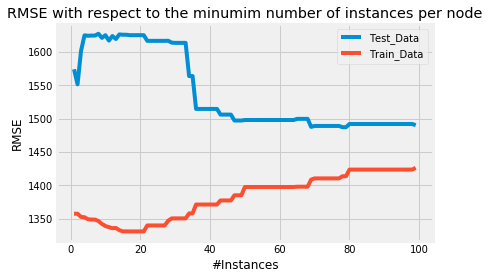

In [5]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_test = []
RMSE_train = []
for i in range(1,100):
    tree = Classification(training_data,training_data,training_data.columns[:-1],i,'cnt')
    RMSE_test.append(test(testing_data,tree)) 
    RMSE_train.append(test(training_data,tree))
   
ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()


As we can see, increasing the minimum number of instances per node leads to a lower RMSE of our test data until we reach approximately the number of 50 instances per node. Here the *Test_Data* curve kind of flattens out and an additional increase in the minimum number of instances per leaf does not dramatically decrease the RMSE of our testing set. 
<br>
<br>
Lets plot the tree with a minimum instance number of 50.
<br>
<br>

In [6]:
tree = Classification(training_data,training_data,training_data.columns[:-1],50,'cnt')
pprint(tree)

{'season': {1: {'weathersit': {1.0: {'workingday': {0.0: 2407.5666666666666,
                                                    1.0: 3284.28}},
                               2.0: 2331.74,
                               3.0: 473.5}},
            2: {'weathersit': {1.0: {'workingday': {0.0: 5850.178571428572,
                                                    1.0: 5340.06}},
                               2.0: 4419.595744680851,
                               3.0: 1169.0}},
            3: {'weathersit': {1.0: {'holiday': {0.0: {'workingday': {0.0: 5715.0,
                                                                      1.0: {'weekday': {1.0: 5996.090909090909,
                                                                                        2.0: 6093.058823529412,
                                                                                        3.0: 6043.6,
                                                                                        4.0: 6538.428571428572,


<br>
<br>
**So thats our final regression tree model. Congratulations - Done!**
<br>
<br>

## Regression Trees in sklearn

Since we have now build a Regression Tree model from scratch we will use sklearn's prepackaged Regression Tree model [sklearn.tree.DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor). The procedure follows the general sklearn API and is as always:
<br>
1. Import the model
2. Parametrize the model
3. Preprocess the data and create a descriptive feature set as well as a target feature set
4. Train the model
5. Predict new query instances
<br>
For convenience we will use the training and testing data from above.


In [7]:
#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor

#Parametrize the model
#We will use the mean squered error == varince as spliting criteria and set the minimum number
#of instances per leaf = 5
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 


#Fit the model
regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])


#Predict unseen query instances
predicted = regression_model.predict(testing_data.iloc[:,:-1])


#Compute and plot the RMSE

RMSE = np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted)**2)/len(testing_data.iloc[:,-1])))
RMSE





1592.7501629176463

With a parameterized minimum number of 5 instances per leaf node, we get nearly the same RMSE as with our own built model above.
Also for this model we will plot the RMSE against the minimum number of instances per leaf node to evaluate the minimum number of instances parameter which yields the minimum RMSE.


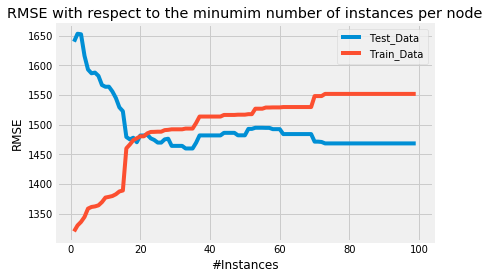

In [8]:

"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 

RMSE_train = []
RMSE_test = []

for i in range(1,100):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    #Predict query instances
    predicted_train = regression_model.predict(training_data.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data.iloc[:,:-1])
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1]))))


   
ax0.plot(range(1,100),RMSE_test,label='Test_Data')
ax0.plot(range(1,100),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()



Using sklearns prepackaged regression tree model yields a minimum RMSE with $\approx$ 10 instances per node. Though, the values for the minimum RMSE with respect to the number of instances are $\approx$ the same as computed with our own created model. Additionally, the RMSE of sklearns decision tree model also flattens out for large numbers of instances per node. 


**References:**
<br>
+ https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/<br>
+ http://nbviewer.jupyter.org/gist/jwdink/9715a1a30e8c7f50a572<br>
+ John D. Kelleher, Brian Mac Namee, Aoife D'Arcy, 2015. *Machine Learning for Predictiive Data Analytics*. Cambridge, Massachusetts: The MIT Press.<br>
+ Lior Rokach, Oded Maimon, 2015. *Data Mining with Decision Trees.* 2nd Ed. Ben-Gurion, Israel, Tel-Aviv, Israel: Wolrd Scientific.<br>
+ Tom M. Mitchel, 1997. *Machine Learning*. New York, NY, USA: McGraw-Hill.<br>
